In [41]:
# Import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.model_selection import train_test_split
import os,datetime

from tensorflow.random import set_seed

# by using same seed with your friends, your friends and you will get the same result after computer generated "randomness"
set_seed(42)
np.random.seed(42)

In [42]:
# Load Data

main_directory = 'Dataset/Concrete Crack Images for Classification' # the main directory for dataset
img_height = 180    # Sizing the image height to 180
img_width = 180     # Sizing the image width to 180
batch = 32
seed = 42

traindata = image_dataset_from_directory(main_directory, labels='inferred',validation_split=0.2,subset='training',     # Train set = 80% from dataset
seed=seed, shuffle=True, image_size=(img_height, img_width),batch_size=batch)

testdata = image_dataset_from_directory(main_directory, labels='inferred',validation_split=0.2,subset='validation',    # Test set = 20% from dataset
seed=seed, shuffle=True, image_size=(img_height, img_width),batch_size=batch)  

Found 40000 files belonging to 2 classes.
Using 32000 files for training.
Found 40000 files belonging to 2 classes.
Using 8000 files for validation.


['Negative', 'Positive']


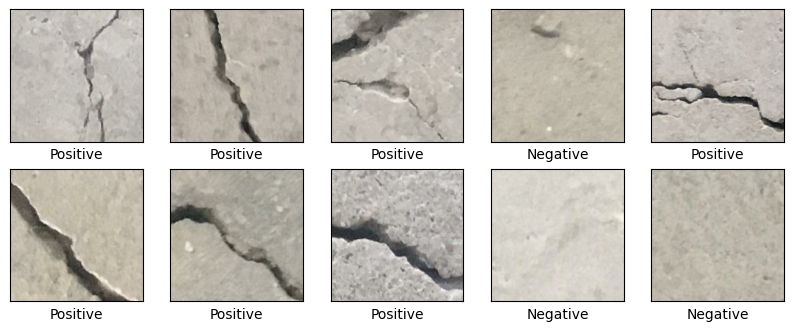

In [43]:
# Inspect some images

class_names = traindata.class_names # Check name of classes from training dataset
print(class_names) # show the name of classes

plt.figure(figsize=(10,10))
for images, labels in traindata.take(1):
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.xlabel(class_names[labels[i]])

In [44]:
# for image_batch, labels_batch in traindata:
#     print(image_batch.shape)
#     print(labels_batch.shape)

In [45]:
# Configure the dataset to be used for training

AUTOTUNE = tf.data.AUTOTUNE

traindata = traindata.cache().prefetch(buffer_size=AUTOTUNE)
testdata = testdata.cache().prefetch(buffer_size=AUTOTUNE)

c:\Users\suhaimi\AppData\Local\anaconda3\envs\tensorflow_cpu\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 90, 90, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 45, 45, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 45, 45, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,378 (481.95 KB)

 Trainable params: 123,378 (481.95 KB)

 Non-trainable params: 0 (0.00 B)

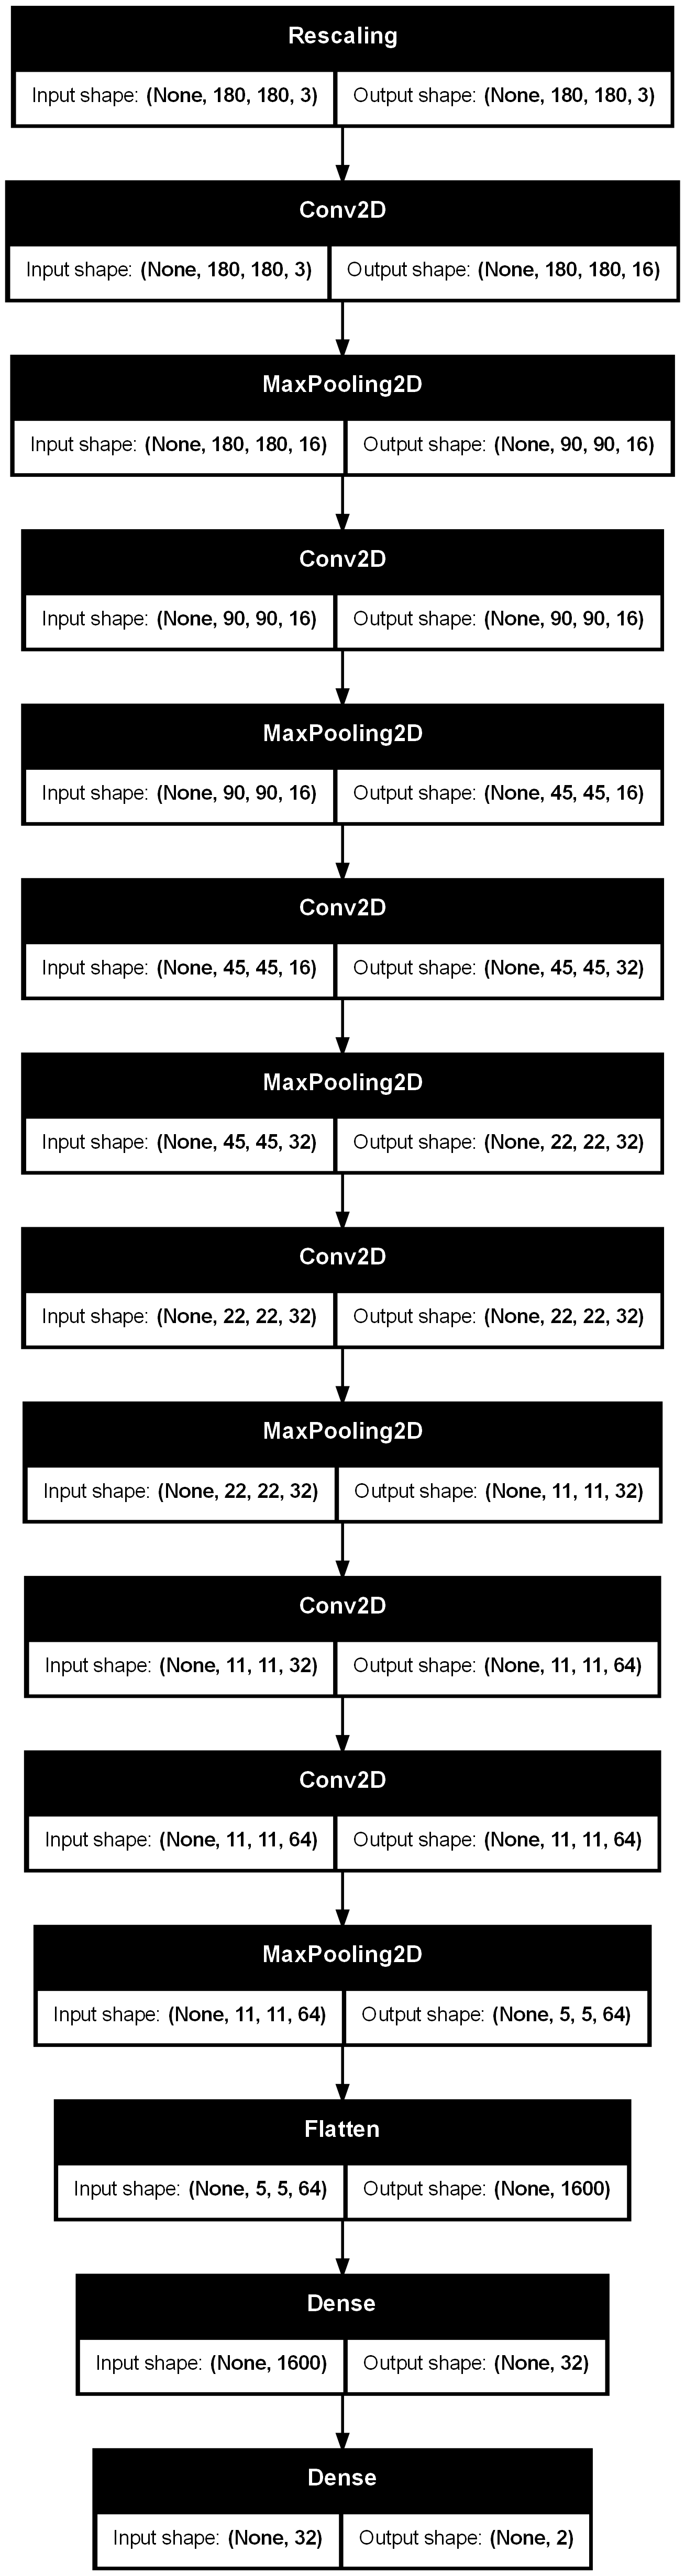

In [46]:
# Model Development

model = keras.Sequential()

model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))   # Input Layer

# Constructing the CNN layers
# Feature Extractor 

model.add(keras.layers.Conv2D(16,(3,3), activation='relu', padding="same")) # Convulution Layer
model.add(keras.layers.MaxPool2D((2,2))) # Pooling Layer
model.add(keras.layers.Conv2D(16,(3,3), activation='relu', padding="same")) # Convulution Layer
model.add(keras.layers.MaxPool2D((2,2))) # Pooling Layer

model.add(keras.layers.Conv2D(32,(3,3), activation='relu', padding="same")) # Convulution Layer
model.add(keras.layers.MaxPool2D((2,2))) # Pooling Layer
model.add(keras.layers.Conv2D(32,(3,3), activation='relu', padding="same")) # Convulution Layer
model.add(keras.layers.MaxPool2D((2,2))) # Pooling Layer

model.add(keras.layers.Conv2D(64,(3,3), activation='relu', padding="same")) # Convulution Layer
model.add(keras.layers.Conv2D(64,(3,3), activation='relu', padding="same")) # Convulution Layer
model.add(keras.layers.MaxPool2D((2,2))) # Pooling Layer

# Classifier

model.add(keras.layers.Flatten())   # Flatten Layer
model.add(keras.layers.Dense(32, activation='relu')) # Hidden Layer
# model.add(tf.keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(2, activation='softmax')) # Output Layer

model.summary() # Model Summary

keras.utils.plot_model(model, show_shapes=True) # Model Architecture Visualized

In [47]:
# Compile the model


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
# Early Stopping Function

es = keras.callbacks.EarlyStopping(patience=3, verbose=2)   # EarlyStopping callback to prevent overfitting.

In [49]:
# Define the TensorBoard Callback

logpath = "TensorBoard/Concrete/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb = keras.callbacks.TensorBoard(logpath)

In [50]:
# Model Training

history = model.fit(
    traindata,
    validation_data = testdata,
    epochs = 100,
    callbacks = [tb,es]
    )

Epoch 1/100


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 62s 61ms/step - accuracy: 0.9220 - loss: 0.1702 - val_accuracy: 0.9860 - val_loss: 0.0520
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 57s 57ms/step - accuracy: 0.9909 - loss: 0.0292 - val_accuracy: 0.9880 - val_loss: 0.0321
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 56s 56ms/step - accuracy: 0.9953 - loss: 0.0172 - val_accuracy: 0.9955 - val_loss: 0.0208
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 56s 56ms/step - accuracy: 0.9946 - loss: 0.0182 - val_accuracy: 0.9959 - val_loss: 0.0214
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 56s 56ms/step - accuracy: 0.9962 - loss: 0.0133 - val_accuracy: 0.9967 - val_loss: 0.0111
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 55s 55ms/step - accuracy: 0.9975 - loss: 0.0095 - val_accuracy: 0.9984 - val_loss: 0.0064
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 57s 57ms/step - accuracy: 0.9985 - loss: 0.0067 - val_accuracy: 0.9984 - val_loss: 0.0050
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 56s 56ms/step - accuracy: 0.9983 - los

In [51]:
# Make predictions with the test data

for image_batch, labels_batch in testdata.take(1):
    predictions = np.argmax(model.predict(image_batch[:10]), axis=1)
    predictions_class = [class_names[x] for x in predictions]
    print(labels_batch[:10])

print(predictions) # Prediction in label encoder


print(f"\nThe predicition result of first ten: {predictions_class}") # Prediction in its real classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
tf.Tensor([1 0 1 1 0 0 0 0 0 0], shape=(10,), dtype=int32)
[1 0 1 1 0 0 0 0 0 0]

The predicition result of first ten: ['Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']


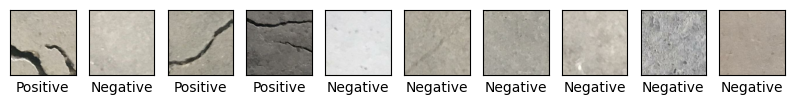

In [52]:
# Visualization of real results and prediction results
# Its seems the model managed to predict correctly

plt.figure(figsize=(10,10))
for images, labels in testdata.take(1):
    for i in range(10):
        plt.subplot(1,10,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.xlabel(class_names[labels[i]])

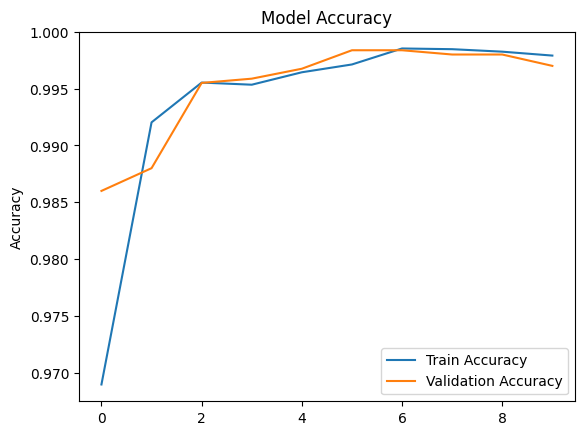

In [53]:
# Plot Accuracy Graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy') 
plt.ylabel('Accuracy')
plt.legend()  
plt.show()

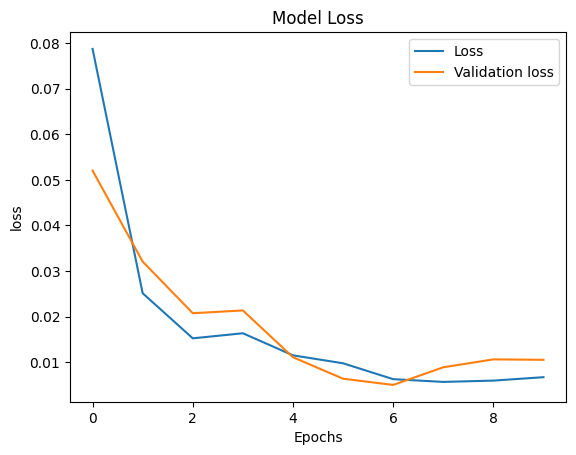

In [54]:
# Plot Loss Graph
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [55]:
# To the save Model

import pickle

Model_path = os.path.join(os.getcwd(),'Model','concrete_crack_classifier.h5')
with open (Model_path,"wb") as file:
    pickle.dump('concrete_crack_classifier.h5',file)